# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [134]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [135]:
study_results.Timepoint.unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [136]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [137]:
study_results.Timepoint.value_counts()

Timepoint
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: count, dtype: int64

In [138]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [139]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [140]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [141]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [142]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [143]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = df2[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").mean()
tumor_median = df2[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").median()
tumor_var = df2[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").var()
tumor_std = df2[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").std()
tumor_sem = df2[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").sem()
 

# Assemble the resulting series into a single summary DataFrame.
tumor_sum_stats ={
    "Mean Tumor Volume":tumor_mean,
    "Median Tumor Volume":tumor_median,
    "Tumor Variance Volume":tumor_var,
    "Tumor Standard Deviation Volume":tumor_std,
    "Tumor SEM Volume":tumor_sem
}

pd.Series(tumor_sum_stats).to_frame()


,0
Mean Tumor Volume,Tumor Volume (mm3) Drug Regimen ...
Median Tumor Volume,Tumor Volume (mm3) Drug Regimen ...
Tumor Variance Volume,Tumor Volume (mm3) Drug Regimen ...
Tumor Standard Deviation Volume,Tumor Volume (mm3) Drug Regimen ...
Tumor SEM Volume,Tumor Volume (mm3) Drug Regimen ...


In [144]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

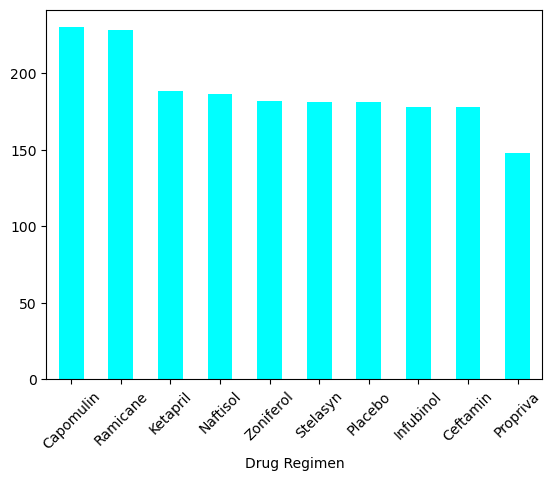

In [145]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
vals = df2["Drug Regimen"].value_counts()

ax = vals.plot.bar(x='Drug Regimen', rot=45, color="cyan")

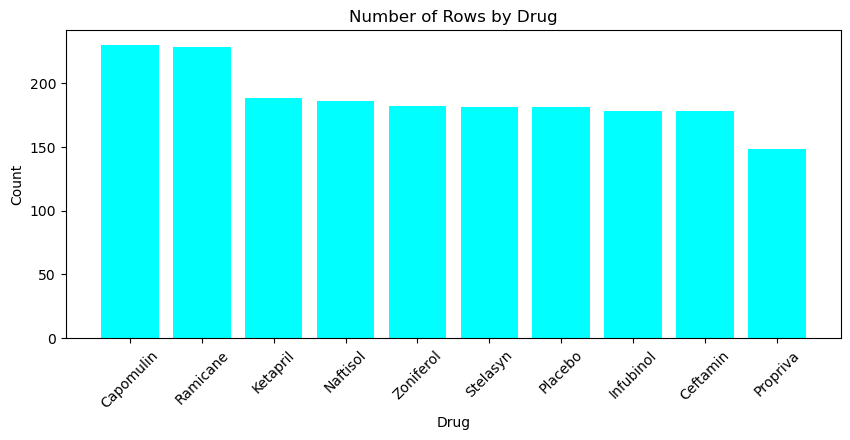

In [146]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
vals = df2["Drug Regimen"].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(vals.index, vals, color="cyan")

plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Number of Rows by Drug")
plt.xticks(rotation=45)
plt.show()

In [147]:
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


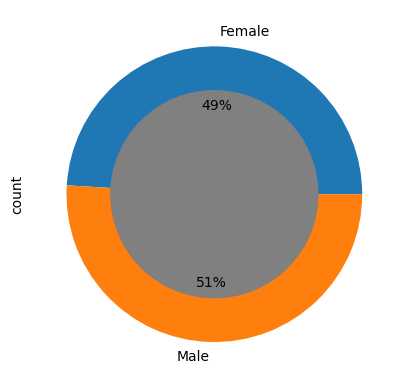

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
vals = df2["Sex"].value_counts()
vals.groupby('Sex').sum().plot(kind='pie', y='value_column',autopct="%1.0f%%")
my_circle=plt.Circle( (0,0), 0.7, color='grey')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

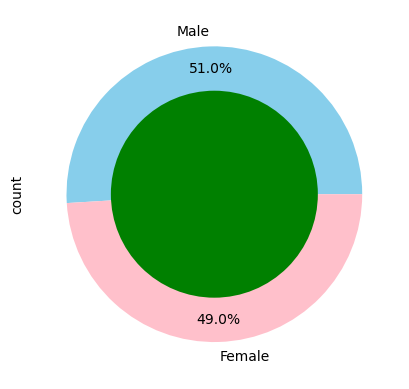

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
vals = df2["Sex"].value_counts()

colors=["skyblue", "pink"]
vals.plot(kind="pie",pctdistance=0.85,colors=colors, autopct='%1.1f%%')

# draw circle
# credit for donut code foudn @ https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/
centre_circle = plt.Circle((0, 0), 0.70, fc='green')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.show()



## Quartiles, Outliers and Boxplots

In [150]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor = df2[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").sum()
tumor_mean
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Credit to prof Booth for code
max_time = df2.groupby('Mouse ID',as_index=False).Timepoint.max()
df3 = pd.merge(max_time, df2, on=['Mouse ID', 'Timepoint'], how="left")
df3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [151]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_lists= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sub = df3.loc[df3["Drug Regimen"] == drug]
    
    # add subset 
    tumor = sub["Tumor Volume (mm3)"]
    tumor_lists.append(tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([0.25, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(drug)
    print(outliers)
    

Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


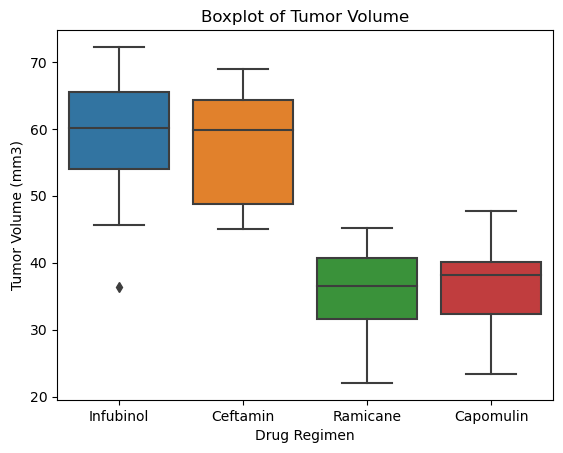

In [152]:
# generate boxplot that show the distribution of the tumor volume for each regimen
# credit to prof Booth for code
import seaborn as sns
df4 = df3.loc[df3['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

sns.boxplot(df4, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.title("Boxplot of Tumor Volume")
plt.show()

## Line and Scatter Plots

In [153]:
df3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [154]:
df2.loc[df2["Drug Regimen"] == "Capomulin"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [155]:
mouse = "b128"

df2.loc[df2["Mouse ID"] == mouse]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


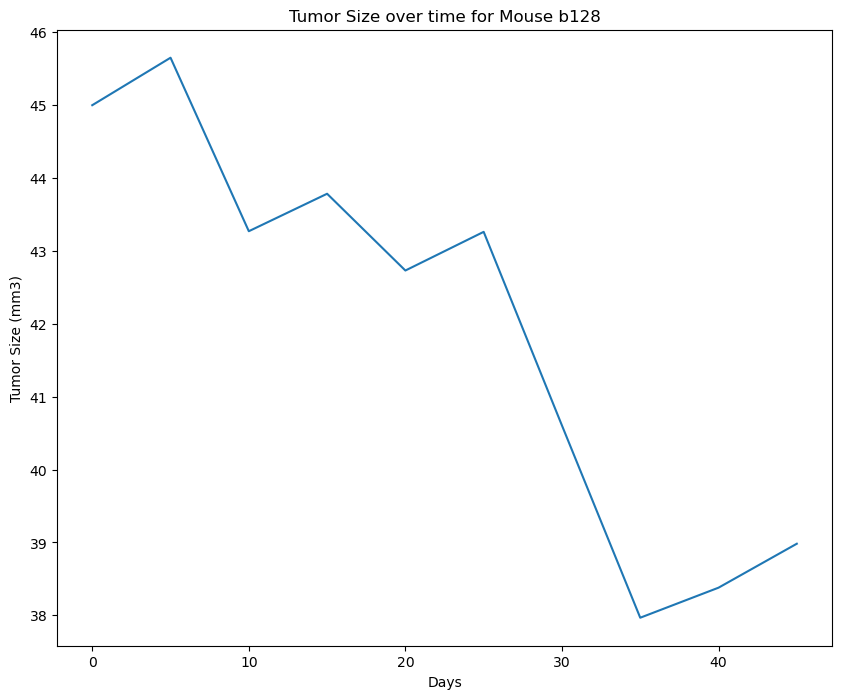

In [156]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "b128"

sub_mouse = df2.loc[df2["Mouse ID"] == mouse]

ok=plt.figure(figsize=(10,8))
plt.plot(sub_mouse.Timepoint, sub_mouse["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Size (mm3)")
plt.title(f"Tumor Size over time for Mouse {mouse}")
plt.show()

In [157]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]

data = cap_df.groupby("Mouse ID", as_index=False).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
data.corr()

ValueError: could not convert string to float: 'b128'

## Correlation and Regression

In [159]:
from scipy.stats import linregress

The r-squared is: 0.7088568047708723


<function matplotlib.pyplot.show(close=None, block=None)>

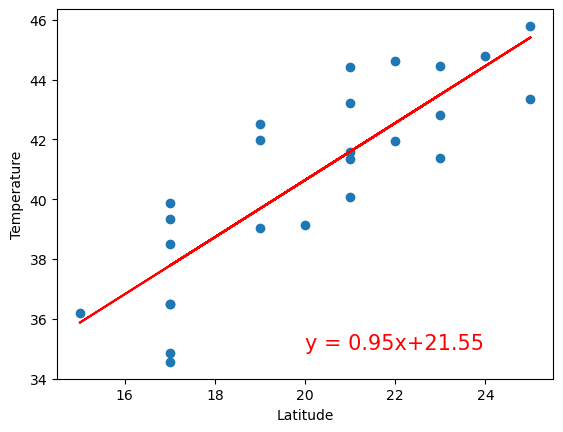

In [162]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Print out the r-squared value along with the plot
x_values = data["Weight (g)"]
y_values = data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x+" + str(round(intercept,2))

# make plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20, 35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [163]:
data.corr()["weight (g)"]["Tumor Volume (mm3)"]

ValueError: could not convert string to float: 'b128'